# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder 
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
df = pd.read_csv(filename, header=0)
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [4]:
df.shape

(28022, 50)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [5]:
df.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

In [6]:
df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,16179.000000,16909.000000,28022.000000,28022.000000,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,0.906901,0.791953,14.554778,14.554778,2.874491,1.142174,1.329708,1.629556,154.228749,18.689387,...,4.814300,4.808041,4.750393,4.647670,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,0.227282,0.276732,120.721287,120.721287,1.860251,0.421132,0.700726,1.097104,140.816605,25.569151,...,0.438603,0.464585,0.415717,0.518023,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.940000,0.680000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,...,4.810000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,1.000000,0.910000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,115.000000,30.000000,...,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,180.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000
max,1.000000,1.000000,3387.000000,3387.000000,16.000000,8.000000,12.000000,21.000000,1000.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000,13.000000


In [7]:
# Transforming the 'object' categorical features into numerical boolean values using one-hot encoding:

to_encode = list(df.select_dtypes(include=['object']).columns)
df[to_encode].nunique()

name                            27386
description                     25952
neighborhood_overview           15800
host_name                        7566
host_location                    1364
host_about                      11962
neighbourhood_group_cleansed        5
room_type                           4
amenities                       25020
dtype: int64

In [8]:
# Taking a look at the unique values, I can see that all columns with the exception of 'host_location', 'neighbourhood_group_cleansed',
# and 'room_type' are descriptive and therefore require NLP, those columns will be dropped:

to_drop = ['name', 'description', 'neighborhood_overview', 'host_name', 'host_about', 'amenities']
df.drop(columns = to_drop, inplace = True)


In [9]:
# Performing one-hot-encoding on 'host_location':

top_50_host_location = list(df['host_location'].value_counts().head(50).index)

In [10]:
# Using a for loop that loops through every value in top_50_host_location and creates one-hot encoded columns, 
# titled 'host_location + '_' +  < host location value > '.

for value in top_50_host_location:
    df['host_location'+ '_'+ value] = np.where(df['host_location']==value,1,0)

In [11]:
# Dropping the original, multi-valued host_location column from the DataFrame df.
# Removing 'host_location' from the to_encode list.

df.drop(columns = 'host_location', inplace = True)
to_encode.remove('host_location')

In [12]:
to_drop = ['name', 'description', 'neighborhood_overview', 'host_name', 'host_about', 'amenities']
for item in to_drop:
    to_encode.remove(item)

to_encode

['neighbourhood_group_cleansed', 'room_type']

In [13]:
# Performing one-hot-encoding the rest of the columns:

for value in to_encode:
    temp_df = pd.get_dummies(df[value], prefix = value + '_')
    df = df.join(temp_df)

In [14]:
df.drop(columns = to_encode, inplace = True)
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,...,"host_location_Princeton, New Jersey, United States",neighbourhood_group_cleansed__Bronx,neighbourhood_group_cleansed__Brooklyn,neighbourhood_group_cleansed__Manhattan,neighbourhood_group_cleansed__Queens,neighbourhood_group_cleansed__Staten Island,room_type__Entire home/apt,room_type__Hotel room,room_type__Private room,room_type__Shared room
0,0.80,0.17,True,8.0,8.0,True,True,1,1.0,NaN,...,0,0,0,1,0,0,1,0,0,0
1,0.09,0.69,True,1.0,1.0,True,True,3,1.0,1.0,...,0,0,1,0,0,0,1,0,0,0
2,1.00,0.25,True,1.0,1.0,True,True,4,1.5,2.0,...,0,0,1,0,0,0,1,0,0,0
3,1.00,1.00,True,1.0,1.0,True,True,2,1.0,1.0,...,0,0,0,1,0,0,0,0,1,0
4,NaN,NaN,True,1.0,1.0,True,True,1,1.0,1.0,...,0,0,0,1,0,0,0,0,1,0


In [15]:
# I now need to see if I have any missing data:

df.isnull().values.any()

True

In [16]:
df.isnull().head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,...,"host_location_Princeton, New Jersey, United States",neighbourhood_group_cleansed__Bronx,neighbourhood_group_cleansed__Brooklyn,neighbourhood_group_cleansed__Manhattan,neighbourhood_group_cleansed__Queens,neighbourhood_group_cleansed__Staten Island,room_type__Entire home/apt,room_type__Hotel room,room_type__Private room,room_type__Shared room
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

host_response_rate                             11843
host_acceptance_rate                           11113
host_is_superhost                                  0
host_listings_count                                0
host_total_listings_count                          0
                                               ...  
neighbourhood_group_cleansed__Staten Island        0
room_type__Entire home/apt                         0
room_type__Hotel room                              0
room_type__Private room                            0
room_type__Shared room                             0
Length: 100, dtype: int64

In [18]:
# Since not all of the columns have missing data, I will create a condition for them:

condition = nan_count != 0 
nan_col_names = nan_count[condition].index # to get the column names 
nan_cols = list(nan_col_names) # convert column names to python list
nan_cols

['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds']

In [19]:
# I want to fill the columns with a dtype of float64:

nan_col_types = df[nan_cols].dtypes
nan_col_types

host_response_rate      float64
host_acceptance_rate    float64
bedrooms                float64
beds                    float64
dtype: object

In [20]:
# Creating dummy variables for missing values:

df['host_response_rate_na'] = df['host_response_rate'].isnull()
df['host_acceptance_rate_na'] = df['host_acceptance_rate'].isnull()
df['bedrooms_na'] = df['bedrooms'].isnull()
df['beds_na'] = df['beds'].isnull()

In [21]:
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,...,neighbourhood_group_cleansed__Queens,neighbourhood_group_cleansed__Staten Island,room_type__Entire home/apt,room_type__Hotel room,room_type__Private room,room_type__Shared room,host_response_rate_na,host_acceptance_rate_na,bedrooms_na,beds_na
0,0.80,0.17,True,8.0,8.0,True,True,1,1.0,NaN,...,0,0,1,0,0,0,False,False,True,False
1,0.09,0.69,True,1.0,1.0,True,True,3,1.0,1.0,...,0,0,1,0,0,0,False,False,False,False
2,1.00,0.25,True,1.0,1.0,True,True,4,1.5,2.0,...,0,0,1,0,0,0,False,False,False,False
3,1.00,1.00,True,1.0,1.0,True,True,2,1.0,1.0,...,0,0,0,0,1,0,False,False,False,False
4,NaN,NaN,True,1.0,1.0,True,True,1,1.0,1.0,...,0,0,0,0,1,0,True,True,False,False


In [22]:
# Filling the values for missing 'host_response_rate' column:

mean_host_response_rate = df['host_response_rate'].mean()
df['host_response_rate'].fillna(value=mean_host_response_rate, inplace = True)

In [23]:
# Filling the values for missing 'host_acceptance_rate' column:

mean_host_acceptance_rate = df['host_acceptance_rate'].mean()
df['host_acceptance_rate'].fillna(value=mean_host_acceptance_rate, inplace = True)

In [24]:
# Filling the values for missing 'bedrooms' column:

mean_bedrooms = df['bedrooms'].mean()
df['bedrooms'].fillna(value=mean_bedrooms, inplace = True)

In [25]:
# Filling the values for missing 'beds' column:

mean_beds = df['beds'].mean()
df['beds'].fillna(value=mean_beds, inplace = True)

In [26]:
# Checking that I successfully replaced all null values 

print(np.sum(df['host_response_rate'].isnull(), axis = 0))
print(np.sum(df['host_acceptance_rate'].isnull(), axis = 0))
print(np.sum(df['bedrooms'].isnull(), axis = 0))
print(np.sum(df['beds'].isnull(), axis = 0))

0
0
0
0


In [27]:
# Making sure I have no missing data:

df.isnull().values.any()

False

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [28]:
# I now want to implement my poject plan, and predict the 'review_scores_location' by trainning various regression
# models and comparing their performances 

In [29]:
# to_drop are the columns I am not including in my label and the dummy variables:

to_drop =['host_response_rate_na', 'host_acceptance_rate_na', 'bedrooms_na','beds_na']
df = df.drop(columns=to_drop)
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,...,"host_location_Princeton, New Jersey, United States",neighbourhood_group_cleansed__Bronx,neighbourhood_group_cleansed__Brooklyn,neighbourhood_group_cleansed__Manhattan,neighbourhood_group_cleansed__Queens,neighbourhood_group_cleansed__Staten Island,room_type__Entire home/apt,room_type__Hotel room,room_type__Private room,room_type__Shared room
0,0.800000,0.170000,True,8.0,8.0,True,True,1,1.0,1.329708,...,0,0,0,1,0,0,1,0,0,0
1,0.090000,0.690000,True,1.0,1.0,True,True,3,1.0,1.000000,...,0,0,1,0,0,0,1,0,0,0
2,1.000000,0.250000,True,1.0,1.0,True,True,4,1.5,2.000000,...,0,0,1,0,0,0,1,0,0,0
3,1.000000,1.000000,True,1.0,1.0,True,True,2,1.0,1.000000,...,0,0,0,1,0,0,0,0,1,0
4,0.906901,0.791953,True,1.0,1.0,True,True,1,1.0,1.000000,...,0,0,0,1,0,0,0,0,1,0


In [30]:
# Creating my labeled examples:

y = df['review_scores_location']
X = df.drop(columns = 'review_scores_location', axis = 1)
X

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,...,"host_location_Princeton, New Jersey, United States",neighbourhood_group_cleansed__Bronx,neighbourhood_group_cleansed__Brooklyn,neighbourhood_group_cleansed__Manhattan,neighbourhood_group_cleansed__Queens,neighbourhood_group_cleansed__Staten Island,room_type__Entire home/apt,room_type__Hotel room,room_type__Private room,room_type__Shared room
0,0.800000,0.170000,True,8.0,8.0,True,True,1,1.0,1.329708,...,0,0,0,1,0,0,1,0,0,0
1,0.090000,0.690000,True,1.0,1.0,True,True,3,1.0,1.000000,...,0,0,1,0,0,0,1,0,0,0
2,1.000000,0.250000,True,1.0,1.0,True,True,4,1.5,2.000000,...,0,0,1,0,0,0,1,0,0,0
3,1.000000,1.000000,True,1.0,1.0,True,True,2,1.0,1.000000,...,0,0,0,1,0,0,0,0,1,0
4,0.906901,0.791953,True,1.0,1.0,True,True,1,1.0,1.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,1.000000,1.000000,True,8.0,8.0,True,True,2,1.0,1.000000,...,0,0,0,0,1,0,0,0,1,0
28018,0.910000,0.890000,True,0.0,0.0,True,True,6,1.0,2.000000,...,0,0,1,0,0,0,1,0,0,0
28019,0.990000,0.990000,True,6.0,6.0,True,True,2,2.0,1.000000,...,0,0,1,0,0,0,0,0,1,0
28020,0.900000,1.000000,True,3.0,3.0,True,True,3,1.0,1.000000,...,0,0,1,0,0,0,1,0,0,0


In [31]:
# Splitting labeled examples into training and test sets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1234)
X_train.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,...,"host_location_Princeton, New Jersey, United States",neighbourhood_group_cleansed__Bronx,neighbourhood_group_cleansed__Brooklyn,neighbourhood_group_cleansed__Manhattan,neighbourhood_group_cleansed__Queens,neighbourhood_group_cleansed__Staten Island,room_type__Entire home/apt,room_type__Hotel room,room_type__Private room,room_type__Shared room
16860,1.000000,0.950000,True,0.0,0.0,True,True,2,1.0,1.0,...,0,0,1,0,0,0,0,0,1,0
17993,0.906901,0.791953,True,0.0,0.0,True,True,1,1.0,1.0,...,0,0,0,1,0,0,0,0,1,0
5214,1.000000,0.980000,True,3.0,3.0,True,True,14,3.0,3.0,...,0,0,1,0,0,0,1,0,0,0
2220,0.906901,0.791953,True,1.0,1.0,True,True,2,1.0,1.0,...,0,0,1,0,0,0,1,0,0,0
16547,1.000000,0.730000,True,2.0,2.0,True,True,2,1.0,1.0,...,0,1,0,0,0,0,0,0,1,0


In [32]:
# Creating and fitting the LinearRegression model:

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# Making predictions on the test data using predict()
y_LR_pred = model_LR.predict(X_test)

In [34]:
# Computing the RMSE and R2 values for the LinearRegression model:

rmse_LR = mean_squared_error(y_test, y_LR_pred, squared=False)
r2_LR = r2_score(y_test, y_LR_pred)

print('[LR] Root Mean Squared Error: {0}'.format(rmse_LR))
print('[LR] R2: {0}'.format(r2_LR))

[LR] Root Mean Squared Error: 0.3101082890860899
[LR] R2: 0.44205162858670577


In [35]:
# Creating a dictionary called param_grid that contains possible hyperparameter values for max_depth and 
# min_samples_leaf:

param_grid = {'max_depth': [4, 8], 'min_samples_leaf': [25, 50]}

In [36]:
# Creating a DecisionTreeRegressor model:

regressor_DT = DecisionTreeRegressor()

In [37]:
# Running a Grid Search with 3-fold cross-validation and fitting the grid search:

grid_DT = GridSearchCV(estimator = regressor_DT, param_grid = param_grid, cv = 3, scoring='neg_root_mean_squared_error')
grid_search_DT = grid_DT.fit(X_train, y_train)
print('Done')

Done


In [38]:
# Printing the RMSE score of the best DT model using the best_score_ attribute of the fitted grid:

rmse_DT = -1 * grid_search_DT.best_score_
print("[DT] RMSE for the best model is : {:.2f}".format(rmse_DT) )

[DT] RMSE for the best model is : 0.32


In [39]:
# Printing the best model hyperparameters identified by the grid search:

best_params_DT = grid_search_DT.best_params_
best_params_DT

{'max_depth': 8, 'min_samples_leaf': 50}

In [40]:
# Initializing a DecisionTreeRegressor model object, but now I'm supplying the best values of hyperparameters 
# max_depth and min_samples_leaf as arguments:

model_DT = DecisionTreeRegressor(max_depth=best_params_DT['max_depth'], min_samples_leaf= best_params_DT['min_samples_leaf'])
model_DT.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=50, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [41]:
# Using the fitted model to make predictions on the test data:

y_DT_pred = model_DT.predict(X_test)

In [42]:
# Computing the RMSE and R2 scores for the DecisionTreeRegressor model:

rmse_DT = mean_squared_error(y_test, y_DT_pred, squared=False)
r2_DT = r2_score(y_test, y_DT_pred)

print('[DT] Root Mean Squared Error: {0}'.format(rmse_DT))
print('[DT] R2: {0}'.format(r2_DT))

[DT] Root Mean Squared Error: 0.31570007897144337
[DT] R2: 0.4217486631801226


In [43]:
# Creating a gradient boosted decision tree model using max_depth = 3 and n_estimators = 300:

model_GBDT = GradientBoostingRegressor(max_depth=3, n_estimators=300)
model_GBDT.fit(X_train, y_train)
print('Done')

Done


In [44]:
# Using the fitted model to make predictions on the test data:

y_GBDT_pred = model_GBDT.predict(X_test)

In [45]:
# Computing the RMSE and R2 scores for the GBDT model:

rmse_DBDT = mean_squared_error(y_test, y_GBDT_pred, squared=False)
r2_GBDT = r2_score(y_test, y_GBDT_pred)

print('[GBDT] Root Mean Squared Error: {0}'.format(rmse_DBDT))
print('[GBDT] R2: {0}'.format(r2_GBDT))  

[GBDT] Root Mean Squared Error: 0.3012938464075124
[GBDT] R2: 0.47331883448493695


In [46]:
# Creating a RandomForestRegressor model using max_depth = 32 and n_estimators = 300:

model_RF = RandomForestRegressor(max_depth=32, n_estimators=300)
model_RF.fit(X_train, y_train)
print('Done')

Done


In [47]:
# Using the fitted model to make predictions on the test data:

y_RF_pred = model_RF.predict(X_test)

In [48]:
# Computing the RMSE and R2 scores for the RandomForestRegressor model:

rmse_RF = mean_squared_error(y_test, y_RF_pred, squared=False)
r2_RF = r2_score(y_test, y_RF_pred)

print('[RF] Root Mean Squared Error: {0}'.format(rmse_RF))
print('[RF] R2: {0}'.format(r2_RF)) 

[RF] Root Mean Squared Error: 0.304534929154202
[RF] R2: 0.4619266428758483


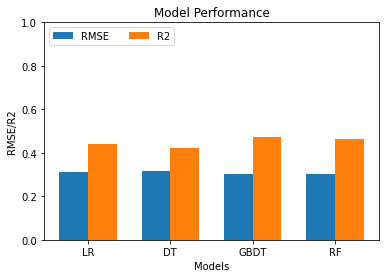

In [49]:
# Plotting the RMSE and R2 score for each regressor:

RMSE_Results = [rmse_LR, rmse_DT, rmse_DBDT, rmse_RF]
R2_Results = [r2_LR, r2_DT, r2_GBDT, r2_RF]
labels = ['LR', 'DT', 'GBDT', 'RF']

rg= np.arange(4)
width = 0.35
plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.bar(rg+width, R2_Results, width, label='R2')
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([0,1])

plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

Analysis:

    From the results above, we can see that the RMSE values of all the regressor models range
    around the ~0.30-0.31 value, which indicates that my machine learning models generalizes well, 
    as its predictions are closer to the actual values in the dataset.
    
    As far as the R2 score goes, the scores aquired are of the range ~0.42-0.47. These results 
    indicate that the model generalizes decently, but does not respond well to the variablity in 
    the data set.
    
    Even though all four regressor models behaved similarily, the best performing regressor model
    for the data set is the GBDT regressor, with the lowest RMSE and highest R2 value.